In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random 

from tensorflow.keras.models import Model

from tensorflow.keras.utils import plot_model

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [21]:
# this is the size of our encoded representations
encoding_dim = 64 #32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = tf.keras.Input(shape=(784,),name='Entrada')
# "encoded" is the encoded representation of the input
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = tf.keras.layers.Dense(784, activation='sigmoid', name='Salida')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [22]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [23]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = tf.keras.Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Entrada (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 Salida (Dense)              (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


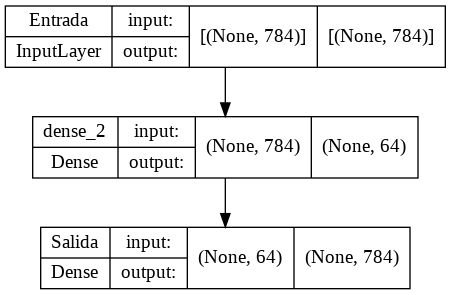

In [24]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()
plot_model(autoencoder, to_file='Autoencoder.png', show_shapes=True)

In [25]:
from tensorflow import keras
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

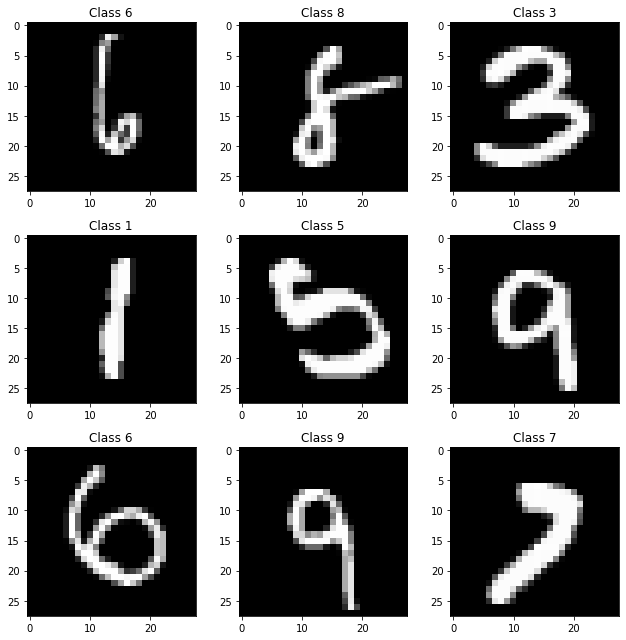

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [27]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(x_train[num])

0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0   91  253  253  255  253  204  121   89    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0  160  252  252  253  252  252  252  249  240  131    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0  111  252  252  253  2

In [28]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [29]:
autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/200
235/235 [==============================] - 2s 6ms/step - loss: 0.2436 - val_loss: 0.1621
Epoch 2/200
235/235 [==============================] - 1s 5ms/step - loss: 0.1417 - val_loss: 0.1240
Epoch 3/200
235/235 [==============================] - 1s 5ms/step - loss: 0.1166 - val_loss: 0.1076
Epoch 4/200
235/235 [==============================] - 1s 5ms/step - loss: 0.1034 - val_loss: 0.0972
Epoch 5/200
235/235 [==============================] - 1s 5ms/step - loss: 0.0947 - val_loss: 0.0901
Epoch 6/200
235/235 [==============================] - 1s 5ms/step - loss: 0.0885 - val_loss: 0.0851
Epoch 7/200
235/235 [==============================] - 1s 5ms/step - loss: 0.0841 - val_loss: 0.0815
Epoch 8/200
235/235 [==============================] - 1s 5ms/step - loss: 0.0811 - val_loss: 0.0791
Epoch 9/200
235/235 [==============================] - 1s 5ms/step - loss: 0.0790 - val_loss: 0.0775
Epoch 10/200
235/235 [==============================] - 1s 5ms/step - loss: 0.0776 - val_lo

In [30]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

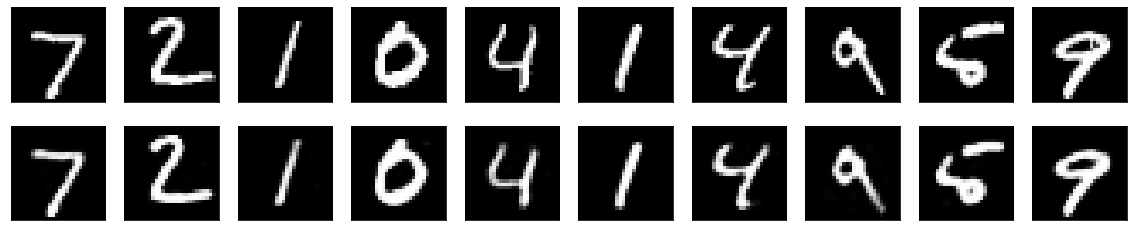

In [31]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

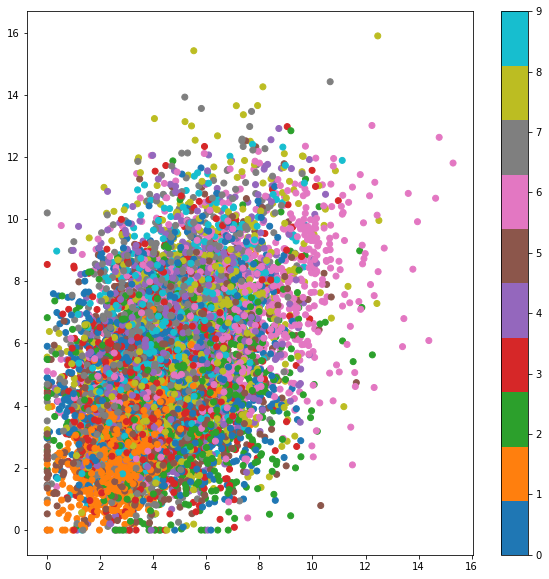

In [32]:
codes = encoder.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(codes[:,0],codes[:,1], c=y_test, cmap='tab10')
plt.colorbar()
plt.show()

In [33]:
from sklearn.manifold import TSNE

X_valid_compressed = encoder.predict(x_test)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


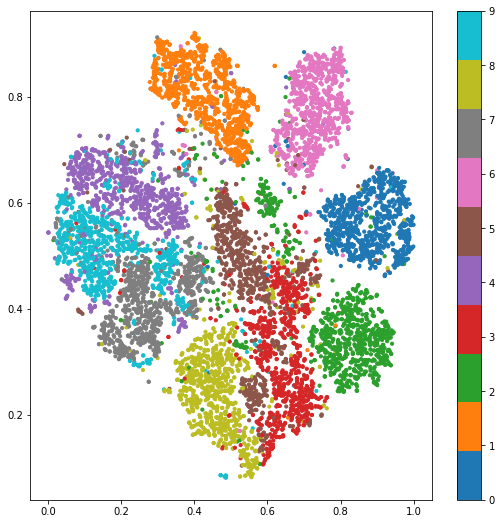

In [34]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_test, s=10, cmap="tab10")
#plt.axis("off")
plt.colorbar()
plt.show()